# Projeto

**Integrantes:** \\
Eduardo Santos de Oliveira Marques \\
Gabriela Fonseza Franck de Souza \\
Henrique Vargas Mendonça

## Objetivos

Escrever um programa de computador que consiga resolver um problema relacionado a Máquinas de Fluxo, resolvendo diversas equações e aceitando as seguintes incógnitas: $\alpha_A$, $\beta_A$, $\alpha_B$, $\beta_B$, $\alpha_F$, $\beta_F$,$f_C$, $f_D$, $f_G$, $f_E$, $Re_C$, $Re_D$, $Re_G$, $Re_E$, $Q_C$, $Q_D$, $Q_G$, $Q_E$ $p_2$, $p_3$, $p_4$ e $p_6$. A simulação é feita através do Google Colab, na linguagem Python, utilizando o framework Jupyter, sendo possível inserir os valores: $\rho$, $\mu$, $\varepsilon_c$, $\varepsilon_D$, $\varepsilon_E$, $\varepsilon_G$, $(z_5-z_4)$, $D_C$, $L_C$, $D_D$, $D_E$ e $L_E$.

## Equacionamento

### Alpha e Beta

$Δp = α - βQ^2$ → $β = - \frac{\Delta p - \alpha}{Q^2}$

$\Delta p = - βQ^2 + aQ + c = α - βQ^2$

$α = aQ + c$

---

### Vazão e Pressão

$Q = A V$

$Q_E = Q_C + Q_D$

$p_2 = α_A - β_A Q_C^2$

$p_3 = α_B - β_B Q_D^2$

$2,31(p_4-p_2)+8,69 × 10^{-4} (L_C Q_C^2/D_C^5)=0$

$2,31(p_4-p_3)+8,69 × 10^{-4} (L_D Q_D^2/D_D^5)=0$

$(z_5-z_4)+2,31(0-p_4)+8,69 \times 10^{-4} (L_E Q_E^2/D_E^5) = 0$

---

### Fator de atrito e Numéro de Reynolds

$Re = D ρ V / 12 u$

Se Re <= 2000:
$f = 64 / Re$

Se Re > 2000: $\frac{1}{\sqrt{f}} = -2 \log_{10} \left( \frac{ϵ}{3,7D} + \frac{2,51}{Re \sqrt{f}} \right)$

# Simulação

### Importação das bibliotecas

In [ ]:
import numpy as np
import math
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

## Definição das variáveis

### Sugeridas

In [ ]:
# Densidade do fluido (a mesma para todos) [lb_m/ft^3]
rho_A, rho_B, rho_F = 62.15, 62.15, 62.15
rho = 62.15
# Viscosidade do fluido (a mesma para todos) [lb_m/ft.s]
u_A, u_B, u_F = 0.0005796, 0.0005796, 0.0005796
u = 0.0005796
# Comprimento dos tubos [ft]
L_C = 140
L_D = 140
L_E = 190
L_G = 150
# Rugosidade dos tubos [ft]
e_C = 0.0025
e_D = 0.0020
e_E = 0.0035
e_G = 0.0030

In [ ]:
# Pontos das curvas (5 pontos)
pontos_D2 = np.array([[0,385], [1000,380], [2000,375], [3000,340], [4000,260]], dtype=float)
pontos_D3 = np.array([[0,345], [1000,340], [2000,330], [3000,290], [4000,210]], dtype=float)
pontos_D4 = np.array([[0,305], [1000,300], [2000,285], [3000,245], [4000,160]], dtype=float)

Específica para o grupo

In [ ]:
# Diferença de cotas (z_5 - z_4) [ft]
z_54 = 130
# Diâmetros nos tubos [in]
D_C = 2.50
D_D = 2.75
D_E = 3.50
D_G = 2.25

### Definidas manualmente

In [ ]:
# Explanação dos valores sugeridos
print("DADOS DE ENTRADA:\n")
print("Valores Sugeridos:")
print("Densidade: rho = 62.15 [lb_m/ft^3]")
print("Viscosidade: u = 0.0005796 [lb_m/(ft.s)]")
print("Diferenças entre as cotas z_5 e z_4: z_54 = 130 [ft]")
print("Rugosidade, Diâmetro e Comprimento do tubo C: e_C = 0.0025 [ft], D_C = 2.50 [in], L_C = 140 [ft]")
print("Rugosidade, Diâmetro e Comprimento do tubo D: e_D = 0.0020 [ft], D_D = 2.75 [in], L_D = 140 [ft]")
print("Rugosidade, Diâmetro e Comprimento do tubo E: e_E = 0.0035 [ft], D_E = 3.50 [in], L_E = 190 [ft]")
print("Rugosidade, Diâmetro e Comprimento do tubo G: e_G = 0.0030 [ft], D_G = 2.25 [in], L_G = 150 [ft]")

# Perguntar se o usuário deseja usar tais valores ou definir manualmente
continuar =  input("\nDeseja continuar com tais valores? Informar [S] para continuar ou [N] para inserir outros: ").upper()
print()

if continuar == 'S':
  print("Valores mantidos.")

elif continuar == 'N':
  # Densidade
  rho = float(input("Digite a densidade (rho) [lb_m/ft^3]: "))
  print()
  # Viscosidade
  u = float(input("Digite a viscosidade (u) [lb_m/(ft.s)]: "))
  print()
  # Diferença entre as cotas
  z_5_4 = float(input("Digite a diferença entre as cotas z_5 e z_4 (z_54) [ft]: "))
  print()
  # Tubo C
  print("Tubo C:\n")
  D_C = float(input("Digite o Diâmetro (D_C) [in]: "))
  e_C = float(input("Digite a Rugosidade (e_C) [ft]: "))
  L_C = float(input("Digite o Comprimento (L_C) [ft]: "))
  print()
  # Tubo D
  print("Tubo D:\n")
  e_D = float(input("Digite a Rugosidade (e_D) [ft]: "))
  D_D = float(input("Digite o Diâmetro (D_D) [in]: "))
  L_D = float(input("Digite o Comprimento (L_D) [ft]: "))
  print()
  # Tubo E
  print("Tubo E:\n")
  e_E = float(input("Digite a Rugosidade (e_E) [ft]: "))
  D_E = float(input("Digite o Diâmetro (D_E) [in]: "))
  L_E = float(input("Digite o Comprimento (L_E) [ft]: "))
  print()
  # Tubo G
  print("Tubo G:\n")
  e_G = float(input("Digite a Rugosidade (e_G) [ft]: "))
  D_G = float(input("Digite o Diâmetro (D_G) [in]: "))
  L_G = float(input("Digite o Comprimento (L_G) [ft]: "))
  print()
  print("Novos valores inseridos.")

else:
  print("Resposta não reconhecida.")

DADOS DE ENTRADA:

Valores Sugeridos:
Densidade: rho = 62.15 [lb_m/ft^3]
Viscosidade: u = 0.0005796 [lb_m/(ft.s)]
Diferenças entre as cotas z_5 e z_4: z_54 = 130 [ft]
Rugosidade, Diâmetro e Comprimento do tubo C: e_C = 0.0025 [ft], D_C = 2.50 [in], L_C = 140 [ft]
Rugosidade, Diâmetro e Comprimento do tubo D: e_D = 0.0020 [ft], D_D = 2.75 [in], L_D = 140 [ft]
Rugosidade, Diâmetro e Comprimento do tubo E: e_E = 0.0035 [ft], D_E = 3.50 [in], L_E = 190 [ft]
Rugosidade, Diâmetro e Comprimento do tubo G: e_G = 0.0030 [ft], D_G = 2.25 [in], L_G = 150 [ft]

Deseja continuar com tais valores? Informar [S] para continuar ou [N] para inserir outros: s

Valores mantidos.


## Funções

### Alpha e Beta

In [ ]:
def AlphaBeta(pontos_D, nome_curva):
  # Eixos do gráfico
  x_D = []
  y_D = []
  for i in range(len(pontos_D)):
    x_D.append(pontos_D[i][0])
    y_D.append(pontos_D[i][1])

  # Plotagem dos pontos
  plt.scatter(x_D, y_D)
  plt.plot(x_D, y_D, label='Pontos')
  plt.xlabel('Flow (US gpm)')
  plt.ylabel('Head (psi)')
  plt.title(nome_curva)
  plt.tight_layout()
  # Ajuste da equação
  p_1 = pontos_D[1,1]
  Q_1 = pontos_D[1,0]
  p_2 = pontos_D[4,1]
  Q_2 = pontos_D[4,0]
  # Ajuste do gráfico
  A = np.array([[1,-Q_1**2], [1,-Q_2**2]])
  B = np.array([[p_1], [p_2]]) 
  X = np.linalg.solve(A, B)
  alpha = X[0,0]
  beta = X[1,0]
  # Eixos do gráfico ajustado
  x = np.linspace(0, x_D[len(x_D) - 1])
  y = alpha - beta*x**2
  plt.plot(x, y, label='Ajuste')
  plt.legend()
  plt.show()
  # Fator de conversão de [ft] para [psi]
  psi = 0.43
  alpha = alpha * psi
  beta = beta * psi
  print("alpha = ", alpha, "[psi]")
  print("beta = ", beta, "[psi/gmp^2]")
  return alpha, beta

### Pressão e Vazão

In [ ]:
# Vazão
def Vazao(solucao, valor, nome):
  Q = solucao[0][valor]
  print(nome + ' = ' + str(Q))
  return Q

# Pressão
def Pressao(alpha, beta, Q, nome):
  p = alpha - beta * Q**2
  print(nome + ' = ' + str(p))
  return p

### Fator de atrito e Número de Reynalds

In [ ]:
# Número de Reynalds
def Reynolds(D, Q, rho, u, nome):
  A = math.pi * (D / 2)**2
  V = Q / A
  Re = (D * rho * V) / (12 * u)
  print(nome + ' = ' + str(Re))
  return Re

# Fator de atrito
def Moody(e, D, Re, nome):
  # Equação de Colebrook
  def Colebrook(f):
    colebrook = - 1 / math.sqrt(f) - 2 * math.log10(e / (3.7 * D) + 2.51 / (Re * math.sqrt(f)))
    return colebrook

  # Moody
  if (Re > 2000):
    f = fsolve(Colebrook, 0.02, xtol = 1.5e-08)
    f = f[0]
  else:
    f = 64 / Re
  # Resultado  
  print(nome + ' = ' + str(f))
  return f

## Cálculos

### Alpha e Beta

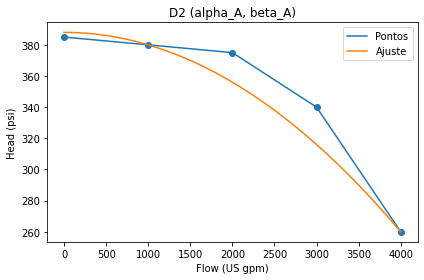

alpha =  166.84 [psi]
beta =  3.4399999999999997e-06 [psi/gmp^2]


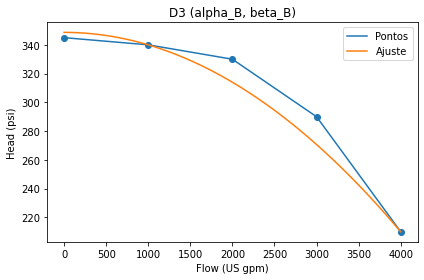

alpha =  149.92666666666668 [psi]
beta =  3.7266666666666664e-06 [psi/gmp^2]


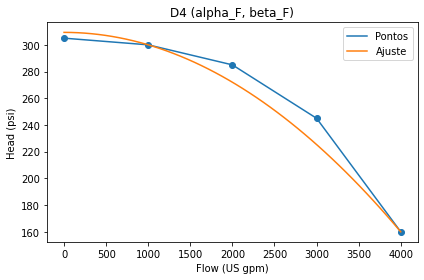

alpha =  133.01333333333332 [psi]
beta =  4.013333333333333e-06 [psi/gmp^2]


In [ ]:
alpha_A, beta_A = AlphaBeta(pontos_D2, 'D2 (alpha_A, beta_A)')
alpha_B, beta_B = AlphaBeta(pontos_D3, 'D3 (alpha_B, beta_B)')
alpha_F, beta_F = AlphaBeta(pontos_D4, 'D4 (alpha_F, beta_F)')

### Vazão e Pressão

In [ ]:
# Constante
c = 8.69 * 10**(-4)

# OBS: Colocar todas as equações juntas faz o 'SymPy' rodar indefinidamente, por isso utilizou-se apenas 4 equações

# Termos
p_4, Q_C, Q_D, Q_E = sp.symbols('p_4, Q_C, Q_D, Q_E', positive=True)
# Equações
eq_1 = sp.Eq(Q_C + Q_D, Q_E)
eq_2 = sp.Eq(2.31 * (p_4 - (alpha_A - beta_A * Q_C**2)+ c * (L_C * Q_C**2 / D_C**5)), 0)
eq_3 = sp.Eq(2.31 * (p_4 - (alpha_B - beta_B * Q_D**2)+ c * (L_D * Q_D**2 / D_D**5)), 0)
eq_5 = sp.Eq(z_54 + 2.31 * (0 - p_4) + c * (L_E * Q_E**2 / D_E**5), 0)
# Solução
solucao = sp.solve([eq_1, eq_2, eq_3, eq_5], [p_4, Q_C, Q_D, Q_E], dict=True)
# Resultados
Q_C = Vazao(solucao, Q_C, 'Q_C')
Q_D = Vazao(solucao, Q_D, 'Q_D')
Q_E = Vazao(solucao, Q_E, 'Q_E')
p_4 = Vazao(solucao, p_4, 'p_4')
p_2 = Pressao(alpha_A, beta_A, Q_C, 'p_2')
p_3 = Pressao(alpha_B, beta_B, Q_C, 'p_3')

# Equacioanmento 2 (para o 'Q_G' e 'p_6')
Q_G = sp.symbols('Q_G', positive=True)
eq_4 = sp.Eq(2.31 * (p_4 - (alpha_F - beta_F * Q_G**2)+ c * (L_G * Q_G**2 / D_G**5)), 0)
# Solução
solucao2 = sp.solve([eq_4], [Q_G], dict=True)
# Resultados
Q_G = Vazao(solucao2, Q_G, 'Q_G')
p_6 = Pressao(alpha_F, beta_F, Q_G, 'p_6')

Q_C = 243.967037436951
Q_D = 271.847952323528
Q_E = 515.814989760479
p_4 = 92.4854361728314
p_2 = 166.635251491176
p_3 = 149.704855782108
Q_G = 133.780440610894
p_6 = 132.941505878756


### Fator de atrito e Número de Reynalds

In [ ]:
# Número de Reynalds
Re_C = Reynolds(D_C, Q_C, rho, u, 'Re_C')
Re_D = Reynolds(D_D, Q_D, rho, u, 'Re_D')
Re_E = Reynolds(D_E, Q_E, rho, u, 'Re_E')
Re_G = Reynolds(D_G, Q_G, rho, u, 'Re_G')

# Fator de atrito
f_C = Moody(e_C, D_C, Re_C, 'f_C')
f_D = Moody(e_D, D_D, Re_D, 'f_D')
f_E = Moody(e_E, D_E, Re_E, 'f_E')
f_G = Moody(e_G, D_G, Re_G, 'f_G')

Re_C = 1110280.65400859
Re_D = 1124695.61263677
Re_E = 1676747.01993502
Re_G = 676474.970897140
f_C = 0.01991362543935783
f_D = 0.018543841482332304
f_E = 0.01982120828023836
f_G = 0.0214523343083544


## Resultados

### Inputs

In [ ]:
print('DADOS DE ENTRADA:\n')
print('rho =', rho, '[lb_m/ft^3]')
print('u =', u, '[lb_m/(ft.s)]')
print('e_C =', e_C, '[ft]')
print('e_D =', e_D, '[ft]')
print('e_E =', e_E, '[ft]')
print('e_G =', e_G, '[ft]')
print('z_54 =', z_54, '[ft]')
print('D_C =', D_C, '[in]')
print('D_D =', D_D, '[in]')
print('D_E =', D_E, '[in]')
print('D_G =', D_G, '[in]')
print('L_C =', L_C, '[ft]')
print('L_D =', L_D, '[ft]')
print('L_E =', L_E, '[ft]')
print('L_G =', L_G, '[ft]')
print()

DADOS DE ENTRADA:

rho = 62.15 [lb_m/ft^3]
u = 0.0005796 [lb_m/(ft.s)]
e_C = 0.0025 [ft]
e_D = 0.002 [ft]
e_E = 0.0035 [ft]
e_G = 0.003 [ft]
z_54 = 130 [ft]
D_C = 2.5 [in]
D_D = 2.75 [in]
D_E = 3.5 [in]
D_G = 2.25 [in]
L_C = 140 [ft]
L_D = 140 [ft]
L_E = 190 [ft]
L_G = 150 [ft]



### Outputs

In [ ]:
# Arredondamento para números positivos menores que 1
def special_round(x, n) :
    lx = math.log10(abs(x))
    if lx >= 0 : return round(x, n)
    return round(x, n - math.ceil(lx))

In [ ]:
print('RESULTADOS:\n')
print('alpha_A =', round(alpha_A, 2), '[psi]')
print('alpha_B =', round(alpha_B, 2), '[psi]')
print('alpha_F =', round(alpha_F, 2), '[psi]')
print('beta_A =', special_round(beta_A, 3), '[psi/(gpm)^2]')
print('beta_B =', special_round(beta_B, 3), '[psi/(gpm)^2]')
print('beta_F =', special_round(beta_F, 3), '[psi/(gpm)^2]')
print("p_2 =", round(p_2, 2), "[psig]")
print("p_3 =", round(p_3, 2), "[psig]")
print("p_4 =", round(p_4, 2), "[psig]")
print("p_6 =", round(p_6, 2), "[psig]")
print("Q_C =", round(Q_C, 2), "[gpm]")
print("Q_D =", round(Q_D, 2), "[gpm]")
print("Q_E =", round(Q_E, 2), "[gpm]")
print("Q_G =", round(Q_G, 2), "[gpm]")
print("Re_C =", format(Re_C, '.2f'), "[adimensional]")
print("Re_D =", round(Re_D, 2), "[adimensional]")
print("Re_E =", round(Re_E, 2), "[adimensional]")
print("Re_G =", round(Re_G, 2), "[adimensional]")
print("f_C =", round(f_C, 5), "[adimensional]")
print("f_D =", round(f_D, 5), "[adimensional]")
print("f_E =", round(f_E, 5), "[adimensional]")
print("f_G =", round(f_G, 5), "[adimensional]")

RESULTADOS:

alpha_A = 166.84 [psi]
alpha_B = 149.93 [psi]
alpha_F = 133.01 [psi]
beta_A = 3.44e-06 [psi/(gpm)^2]
beta_B = 3.73e-06 [psi/(gpm)^2]
beta_F = 4.01e-06 [psi/(gpm)^2]
p_2 = 166.64 [psig]
p_3 = 149.70 [psig]
p_4 = 92.49 [psig]
p_6 = 132.94 [psig]
Q_C = 243.97 [gpm]
Q_D = 271.85 [gpm]
Q_E = 515.81 [gpm]
Q_G = 133.78 [gpm]
Re_C = 1110294.00 [adimensional]
Re_D = 1124704.49 [adimensional]
Re_E = 1676729.40 [adimensional]
Re_G = 676422.28 [adimensional]
f_C = 0.01991 [adimensional]
f_D = 0.01854 [adimensional]
f_E = 0.01982 [adimensional]
f_G = 0.02145 [adimensional]
